# Univariable Linear Regression #

In the first part of exercise 1,  we're tasked with implementing simple linear regression to predict profits for a food truck.  


I will be using [Kaggle's](https://www.kaggle.com/unsdsn/world-happiness) World Happiness Data Report to predict a person's happiness level **soley based one their income level.**

Thank you to [John Wittenaur](http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/) & [Jason Browiee](https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/) for writing such detailed and explanatory journals. Much of the material, exercises, and code examples in this guide are referenced and borrowed from their entries. 

## More About Our Data ##

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. 

The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Import our libraries ##

In [7]:
import os

In [8]:
import sys

In [162]:
import numpy as np 

In [10]:
import pandas as pd

In [12]:
import matplotlib.pyplot as plt

/Users/kevindasilva/anaconda2/envs/happinessIncome/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [13]:
%matplotlib inline

## Import Data into Data Frame ##

We can now use pandas to load the data into a data frame using our 'head' function to get a look at the first few (4) rows of our data.

In [82]:
# create path to the data
path = os.getcwd() + '/data/2015.csv'

In [260]:
# create data variable using panda's pd.read_csv();
data = pd.read_csv(path);

In [261]:
# gimme dat head
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Describe Function & Visualizations ##

Panda's ```describe()``` function gives us some basic "out-of-the-box" statistics about our data set. This will help us get a good "feel" for our data.

In [262]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Unfortunately, this is not enough info about our data. It will be a lot easier to understand our data if we **visualize it**. Panda's ```plot()``` function is perfect for this task. 

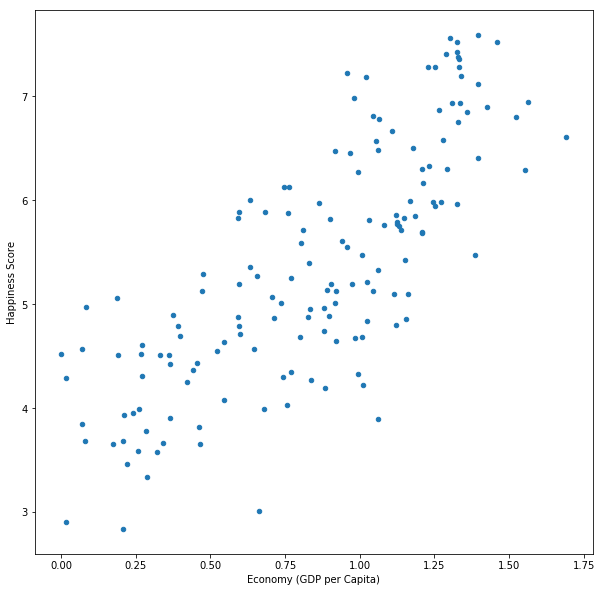

In [264]:
data.plot(kind = "scatter" , x = "Economy (GDP per Capita)", y = "Happiness Score", figsize = (10,10))
plt.show()

Visualizing the data is absolutely essential. We can clearly see that there is somewhat of a linear trend of increasing happiness as GDP per capita is increased.

Using this graph scatter plot above, **we can now try to create a "fit" or a model for our data**. We can use this model to create hypothesis' (i.e if a country's GDP per capita is ~1.3 on average, how happy are their people?

Now the fun part! We can use this data to create our Linear Regression algorithm.

## Histogram's and Density Plots ##

### What exactly is a Histogram and why should I use it? ###

A fast way of understanding the **distribution of our data** is to use a histogram. 

In example, if we had a dataset from how many cherries are cooked into each pie at a bakery. A histogram would allow us to see how many pies have 5 to 10 cherries, how many of them have at least 11 cherries but no more than 15 cherries and how many of them have at least 16 cherries but no more than 30 cherries.

Histograms group data into bins and provide you a count (amount/number) of observations in each bin. From the shape of he bins, you can see the whether the attribute is Gausian, has exponential distribution, skewed, etc. 

It can also help identify **outliers ** 

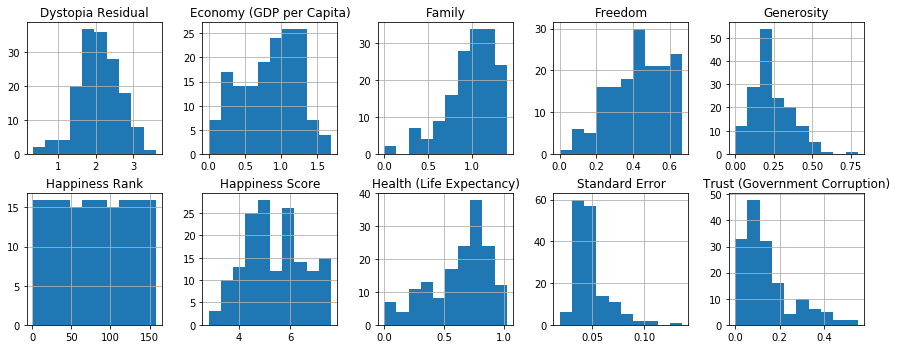

In [219]:
# Cool Function from Panda's Lib called .hist() passing in the size.
# You can also use data.plot.hist() 
# However, that will give you a histogram of all of the variables in ONE histogram
data.hist(figsize= (15,15), layout = (5,5))
#plt.show to hide all the object details
plt.show()

As you can see, our variables (attributes) like ```Dystopia Residual```, ```Generosity```, and ```Health``` seem to have a Gaussian distribution while ```Trust``` and our ```Standard Error``` seems to have exponential distribution.

### What is a Density Plot? ###

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, **much like your eye tried to do with the histograms.**

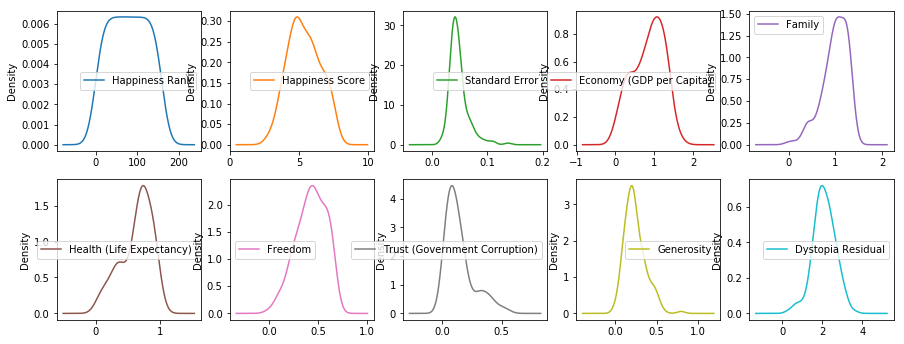

In [152]:
data.plot(kind='density', subplots=True, layout=(5,5), sharex=False, figsize = (15,15))
plt.show()

## Correlation Matrix Plot ##

Correlation gives us an indication how related the changes are between our variables. If two variables change in the same direction then they are positively related. If two variables change in opposite directions, they are negatively related.

You can calculate the correlation for each pair of our attributes using a correlation matrix. We can plot this correlation matrix to give us an idea of how much correlation there are between a set a variables.

This is useful to know, because some machine learning algorithms like linear and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [210]:
# First create our correlations using panda's .cor() function and assign it to our variable, correlations.
correlations = data.corr()
# What variables do we want to input into our correlation matrix?
names = ['Happiness', 'Economy', 'Freedom', 'Generosity', 'Family', 'Trust']

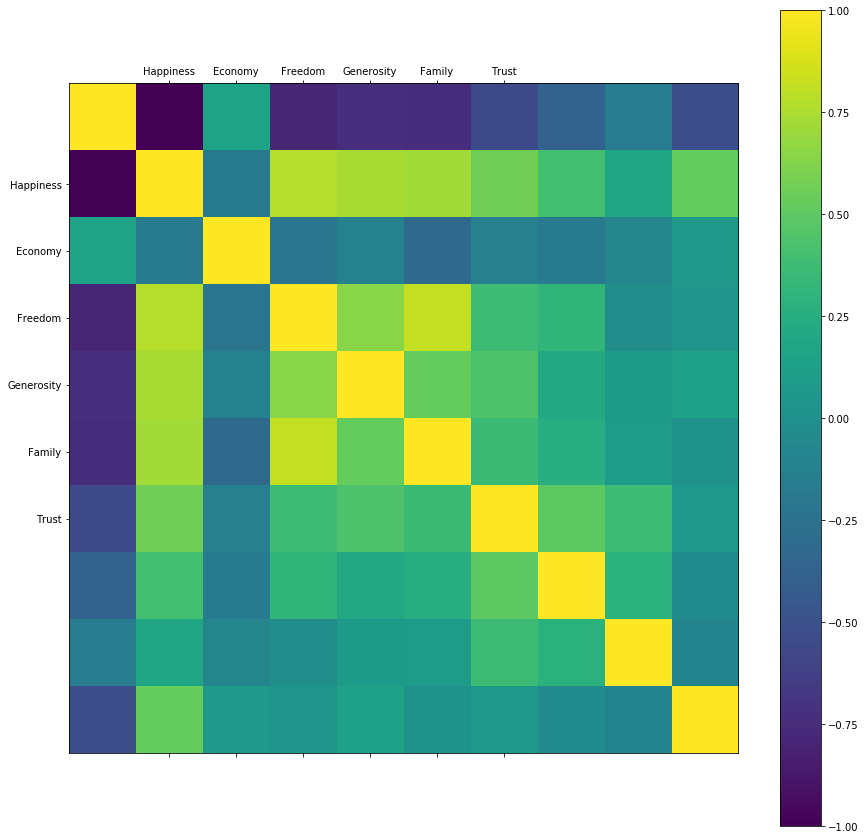

In [234]:
# Plot correlation matrix
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(1,7,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()


## Implementing Simple Linear Regression ##

We are simply creating a linear model of our data _X_, using some number of parameters _theta_ that could describe the variance in our data such that given a new point that is not in our data _X_ we can accurately predict the outcome, _y_ without actually knowing what _y_ is!

We are also going to be using an optimization technique called gradient descent which will give us the ideal parameters _theta_ to best graph our line of hypothesis.

The first thing we must do is create a cost function. Cost functions simply measure the accuracy of our model by calculating the error (difference) of our predictions data point and the actual data point. (ie, For the happiness of a given country is 4 and we predict that is 7, our error is (7-4)^2 = 8. This process is repeated for every data point in our data _X_, and summed to get the cost.

In [127]:
def costFunc(x,y,theta): 
    inner = np.power(((x * theta.T) - y), 2)
    return np.sum(inner)/(2*len(x))

Above we are using numpy's linear algebra capabilities to compute the result as a series of matrix operation. This is far more computationally efficient than a "for" loop.

In [265]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols]  

Finally, we're going to convert our data frames to numpy matrices and instantiate a parameter matirx.

In [266]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

In [268]:
# Lets look at the shape of our matrices to see if there are any errors/bugs
X.shape, theta.shape, y.shape  

((158, 12), (1, 2), (158, 1))

In [271]:
costFunc(X, y, theta)  

ValueError: shapes (158,12) and (2,1) not aligned: 12 (dim 1) != 2 (dim 0)